# Barycentric Lagrange interpolation on Chebyshev points

Let us interpolate the Runge function on $[-1,+1]$
$$
f(x) = \frac{1}{1 + 16 x^2}
$$
using the Barycentric formula
$$
p(x) =  \frac{ \sum\limits_{i=0}^N{}' \frac{(-1)^i}{x - x_i} f_i }{ \sum\limits_{i=0}^N{}' \frac{(-1)^i}{x - x_i} }
$$
where the prime on the summation means that the first and last terms must be multiplied by a factor of half.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

Define the function to be interpolated.

In [2]:
def fun(x):
    f = 1.0/(1.0+16.0*x**2)
    return f

The next function evaluates the Lagrange interpolation using Chebyshev points.

In [3]:
def BaryInterp(X,Y,x):
    nx = np.size(x)
    nX = np.size(X)
    f  = 0*x
    # Compute weights
    w  = (-1.0)**np.arange(0,nX)
    w[0]    = 0.5*w[0]
    w[nX-1] = 0.5*w[nX-1]
    # Evaluate barycentric foruma at x values
    for i in range(nx):
        num, den = 0.0, 0.0
        for j in range(nX):
            if np.abs(x[i]-X[j]) < 1.0e-15:
                num = Y[j]
                den = 1.0
                break
            else:
                num += Y[j]*w[j]/((x[i]-X[j]))
                den += w[j]/(x[i]-X[j])
        f[i] = num/den
    return f

In [4]:
xmin, xmax = -1.0, +1.0
N = 19 # degree of polynomial

Let us interpolate on Chebyshev points.

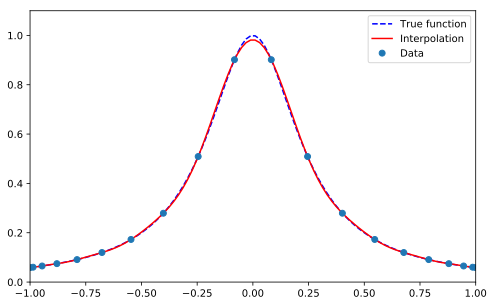

In [5]:
X = np.cos(np.linspace(0.0,np.pi,N+1))
Y = fun(X)
x = np.linspace(xmin,xmax,100)
fi = BaryInterp(X,Y,x)
fe = fun(x)
plt.figure(figsize=(8,5))
plt.plot(x,fe,'b--',x,fi,'r-',X,Y,'o')
plt.legend(("True function","Interpolation","Data"),loc='upper right')
plt.axis([-1.0,+1.0,0.0,1.1]);